In [3]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'sklearn'

In [4]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Titanic_demo_1.csv')
# Colab
df = pd.read_csv(r'C:\Users\live7086\PycharmProjects\DL_HW\Titanic_assignment_data_33.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,32.0,0,0,7.8958,S,no
1,3,male,7.0,1,1,15.2458,C,yes
2,2,female,30.0,0,0,12.3500,Q,yes
3,1,female,53.0,2,0,51.4792,S,yes
4,1,male,NaN,0,0,51.8625,S,no
...,...,...,...,...,...,...,...,...
1042,2,male,25.0,0,0,10.5000,S,no
1043,1,male,62.0,0,0,26.5500,S,no
1044,1,female,23.0,3,2,263.0000,S,yes
1045,3,female,47.0,1,0,7.0000,S,no


# 1. Quick overview to get a grasp of the data set

key function: pd.info(); pd.astype(); describe(); pd.value_counts()

In [3]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [4]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1001.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,30.147852,0.498854,0.385027,33.295479
std,0.837836,14.179637,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


Note: Pclass is categorical data with dummies, so converting to correct data type is required

In [5]:
# Change data type
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   object 
 1   Sex       1309 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  1309 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


In [6]:
# 1.2 Show the correct descriptive statistics
df.describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1309.000000,1309.000000,1308.000000
mean,30.147852,0.498854,0.385027,33.295479
std,14.179637,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [7]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1309,1309,1001.000000,1309.000000,1309.000000,1308.000000,1309,1309
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,709,843,NaN,NaN,NaN,NaN,914,821
mean,NaN,NaN,30.147852,0.498854,0.385027,33.295479,NaN,NaN
std,NaN,NaN,14.179637,1.041658,0.865560,51.758668,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


In [8]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         709
1         323
2         277
dtype: int64
+-----------------------+
Sex   
male      843
female    466
dtype: int64
+-----------------------+
Embarked
S           914
C           271
Q           124
dtype: int64
+-----------------------+
Survived
no          821
yes         488
dtype: int64


In [9]:
# Tips: row,column
df[['Age','SibSp','Parch','Fare']].describe()
#df.loc[:,['Age','SibSp','Parch','Fare']].describe()
#df.iloc[:,[2,3,4,5]].describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1309.000000,1309.000000,1308.000000
mean,30.147852,0.498854,0.385027,33.295479
std,14.179637,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [10]:
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1298,1,male,50.0,1,1,211.5000,C,yes
1300,3,female,3.0,1,1,13.7750,S,yes
1302,1,female,37.0,1,0,90.0000,Q,yes
1303,3,female,28.0,0,0,7.7750,S,no


In [11]:
# Recheck the descriptive statistics
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,30.147852,0.503497,0.415584,37.305257
std,14.179637,0.893442,0.842091,56.336078
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.900000
75%,39.000000,1.000000,1.000000,37.004200
max,80.000000,5.000000,6.000000,512.329200


In [12]:
# Recheck the descriptive statistics
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         468
1         280
2         253
dtype: int64
+-----------------------+
Sex   
male      621
female    380
dtype: int64
+-----------------------+
Embarked
S           756
C           199
Q            46
dtype: int64
+-----------------------+
Survived
no          605
yes         396
dtype: int64


In [13]:
# 2.2 Using unique function to check category label
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['3' '1' '2']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [14]:
#2.3 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,1,0,0,0,1,1,0,0,0,1
1300,3.0,1,1,13.7750,0,0,1,1,0,0,0,1,0,1
1302,37.0,1,0,90.0000,1,0,0,1,0,0,1,0,0,1
1303,28.0,0,0,7.7750,0,0,1,1,0,0,0,1,1,0


Note: get_dummies function generates the onehotencode style dummies

In [15]:
# Export to CSV file Note: preset folder path is required
#dummied_new_df.to_csv('D:/data_analysis/PyExport/Titanic_demo_deleteNA.csv',index=False, header=True)
# Colab
dummied_new_df.to_csv('Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


# Addition tips for data preprocessing

Sometimes deleting all missing value is not the only optimal option during data preprocessing, so this section provides two additional tips for dealing with missing value. 1. Find the specific data point in a column  2. Fill the missing value

In [16]:
# Tips: Find the specific data point using np.isnan function
# Find missing value with numpy: row index
np.where(np.isnan(df['Fare']))

(array([1043], dtype=int64),)

In [17]:
# Call the specific data point via row index
df.loc[1043,:]

Pclass         3
Sex         male
Age          NaN
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Survived     yes
Name: 1043, dtype: object

In [18]:
# Drop via row index 
Tip_df=df.drop([1043])
np.where(np.isnan(Tip_df['Fare']))

(array([], dtype=int64),)

In [19]:
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   object 
 1   Sex       1308 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 92.0+ KB


In [20]:
# Tips: Deal with missing value by filling it
Tip_df=Tip_df.fillna({'Age':round(Tip_df['Age'].mean(),0)})
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   object 
 1   Sex       1308 non-null   object 
 2   Age       1308 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 92.0+ KB


# 3. Data scaling with minimax technique

Key function: MinMaxScaler()

In [21]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.265823,0.2,0.0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.468354,0.2,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.316456,0.0,0.0,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.430380,0.2,0.0,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.430380,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# 4. Set dependent variable(Y or target) & independent variable(X) 

In [22]:
# Qucik recap
dummied_new_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0


Note: Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.  

In [23]:
#set x (make prediction) with minimax
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)

Note: Transforming target to integer datatype is optional

# 5. Spilt the data into train & test set

key function: train_test_split()

key parameters for train_test_spilt(): test_size; random_state 

In [24]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [25]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 483, 1: 317})
------------------------------------
y_test : Counter({0: 122, 1: 79})


# 6. Creating Net 

In [26]:
# Quick recap: Total of 12 features in the data set
x.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.265823,0.2,0.0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.468354,0.2,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.316456,0.0,0.0,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.430380,0.2,0.0,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.430380,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [27]:
# Tips: Using shape to call the amount of features in the data set 
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


# Sequential style coding for creating net

Note: The following code demonstrate the most common style for creating net

In [29]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
opt=SGD(learning_rate=0.05,momentum=0.5)
#opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model

# Note: The validation set should be split manually

In [30]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6702 - accuracy: 0.5906 - val_loss: 0.6469 - val_accuracy: 0.6250
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.5938 - val_loss: 0.6319 - val_accuracy: 0.6250
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.5984 - val_loss: 0.6190 - val_accuracy: 0.6187
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6109 - val_loss: 0.6075 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6438 - val_loss: 0.5967 - val_accuracy: 0.6750
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.6812 - val_loss: 0.5855 - val_accuracy: 0.7063
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.7266 - val_loss: 0.5770 - val_accuracy: 0.7437
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.7766 - val_loss: 0.5529 - val_accuracy: 0.7625
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7734 - val_loss: 0.5538 - val_accuracy: 0.7563
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7781 - val_loss: 0.5534 - val_accuracy: 0.7563
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7688 - val_loss: 0.5541 - val_accuracy: 0.7563
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7781 - val_loss: 0.5544 - val_accuracy: 0.7563
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7797 - val_loss: 0.5535 - val_accuracy: 0.7563
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7797 - val_loss: 0.5558 - val_accuracy: 0.7563
Epoch 

In [31]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

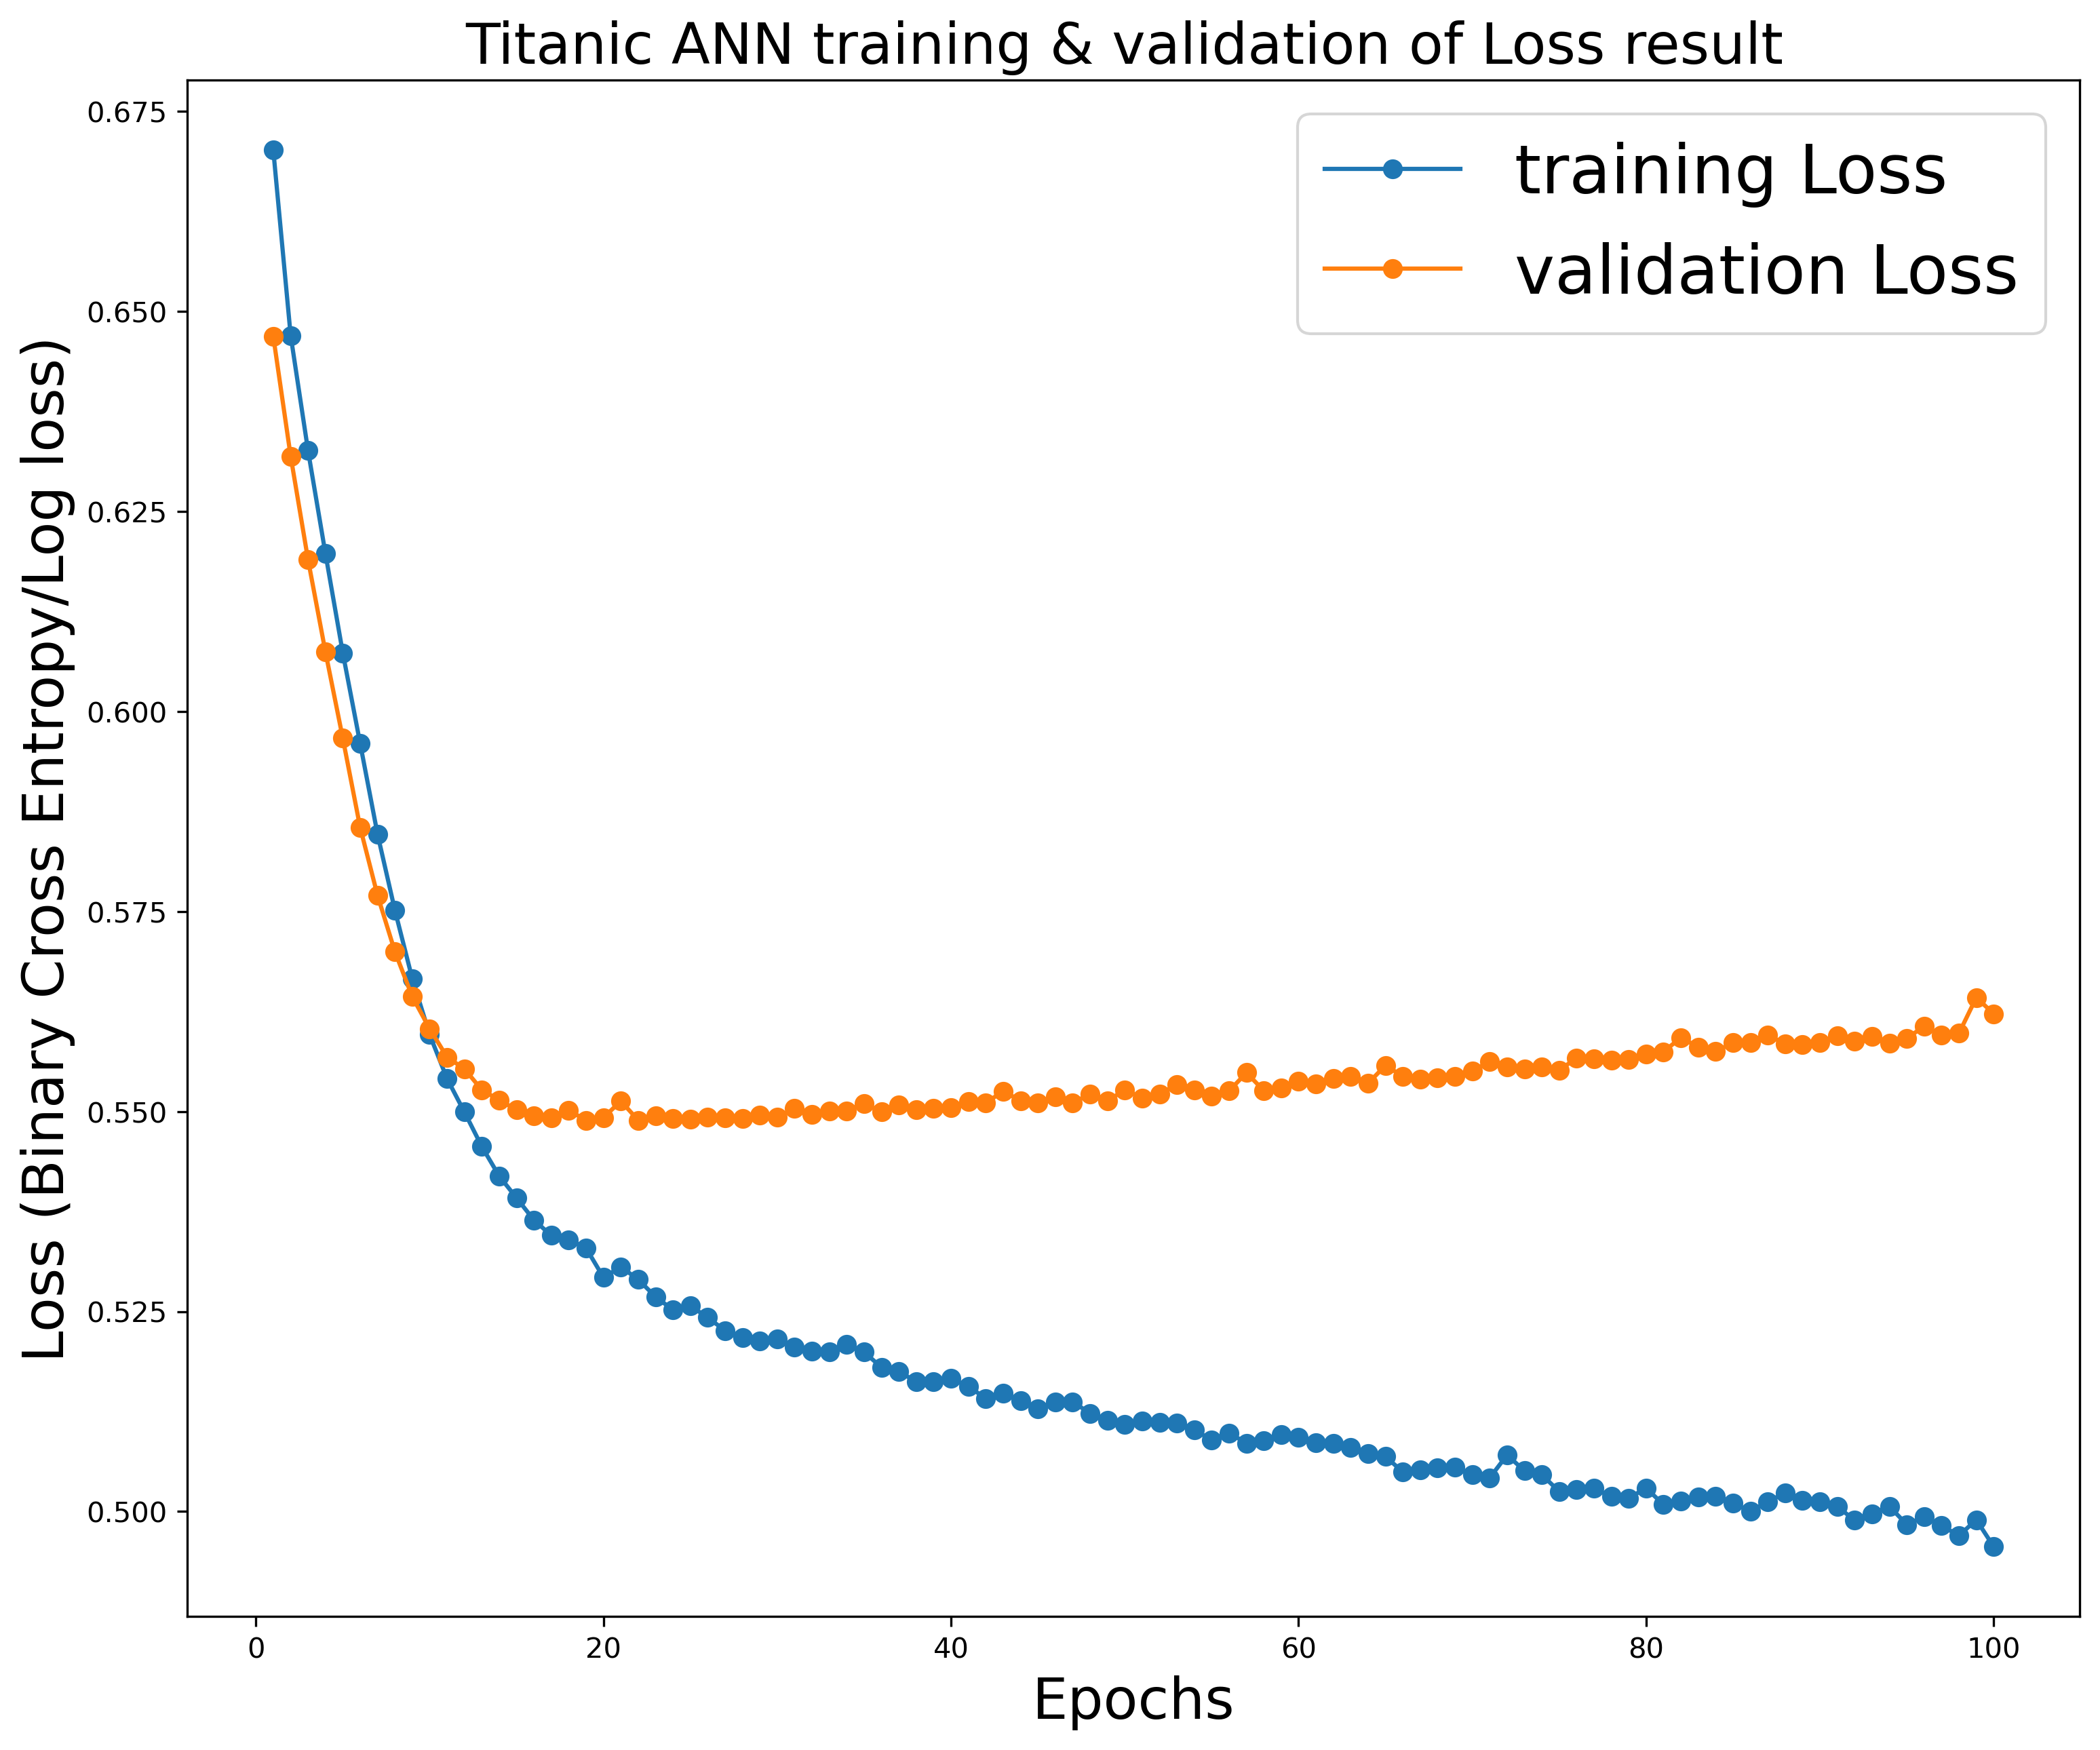

In [32]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

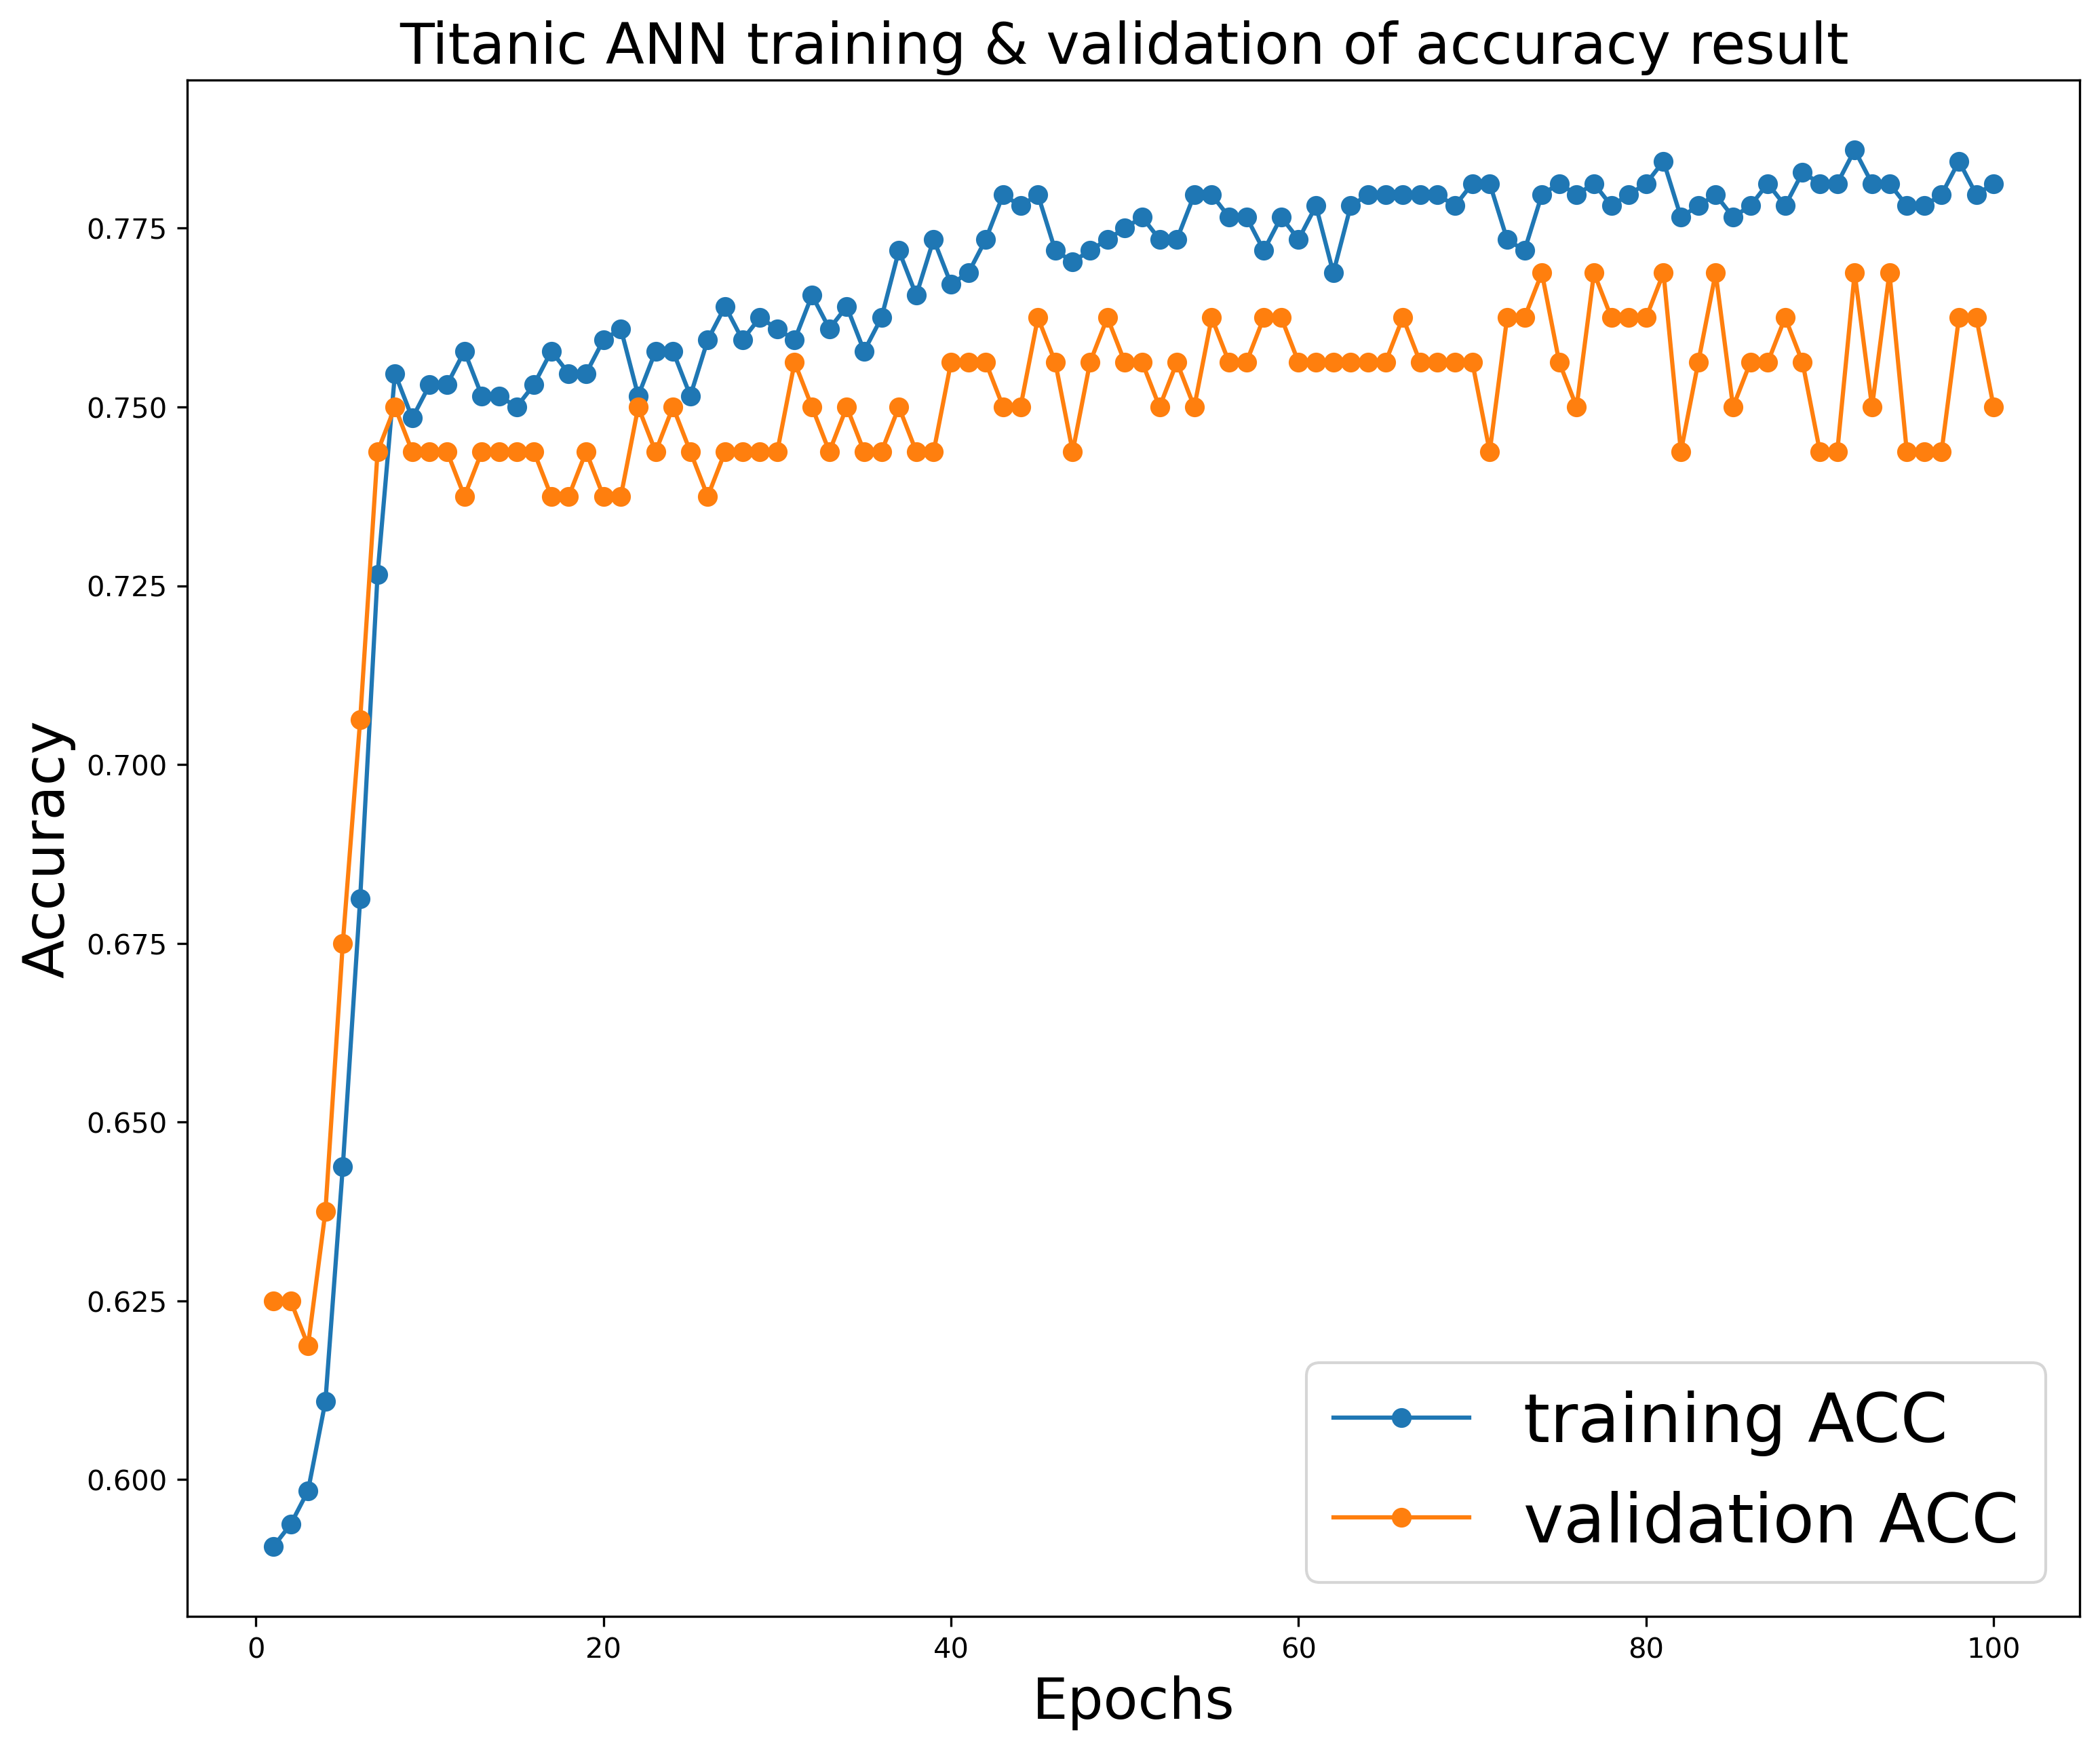

In [33]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [34]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model.save('titanic_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [35]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [36]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.27132416],
       [0.18653998],
       [0.13617423],
       [0.15710062],
       [0.39956915],
       [0.32707423],
       [0.49509853],
       [0.5263569 ],
       [0.12640533],
       [0.16961312],
       [0.51882017],
       [0.65451896],
       [0.14467457],
       [0.8229685 ],
       [0.27653384],
       [0.8249837 ],
       [0.10410258],
       [0.46297947],
       [0.09330064],
       [0.29492992],
       [0.10825056],
       [0.60828424],
       [0.8008431 ],
       [0.31237662],
       [0.11991546],
       [0.6172355 ],
       [0.90324277],
       [0.78158104],
       [0.18653965],
       [0.6747283 ],
       [0.23139358],
       [0.18625233],
       [0.7917839 ],
       [0.11320344],
       [0.8527955 ],
       [0.9046476 ],
       [0.16617265],
       [0.84211814],
       [0.8086715 ],
       [0.6581441 ],
       [0.89518857],
       [0.14276701],
       [0.7856565 ],
       [0.9075532 ],
       [0.15055174],
       [0.14434776],
       [0.09670511],
       [0.228

Note: The prediction generate by ANN are values between 0 and 1, so a transformation is required before calculating the metrics and confusion matrix 

In [37]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [38]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 75.62
Testing f1s: 65.25
Testing pre: 74.19
Testing sen: 58.23
Testing spe: 86.89

Testing confusion matrix:
[[106  16]
 [ 33  46]]


In [39]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
ANN_model.evaluate(x_test,y_test,batch_size=64,verbose=1)

4/4 [==============================] - 0s 996us/step - loss: 0.5310 - accuracy: 0.7562


[0.5310311913490295, 0.7562189102172852]